#Níveis de expressão de 77 proteínas medidas no córtex cerebral de camundongos com síndrome de Down expostos ao contexto de condicionamento do medo, uma tarefa usada para avaliar a aprendizagem associativa

##PASSOS DA CATEGORIZAÇÃO

* INICIALIZAÇÃO

* CARREGAMENTO BASE

* CONVERSÃO DE ATRIBUTOS CATEGÓRICOS EM BINÁRIO

* DIVISÃO EM TREINO E TESTE

* TREINAMENTO DA REDE NEURAL

* AVALIAÇÃO DE RESULTADOS




#Início

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls

cars.csv	 concreto.csv  kddCup.txt  vinho.txt
casasBoston.csv  Espaço.csv    Ratos.csv


In [5]:
df1 = pd.read_csv('Ratos.csv', header=0)
df1.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,311_1,0.743118,0.862653,0.377742,2.735757,6.067570,0.219049,0.185338,2.277492,0.194465,...,0.125482,0.440142,0.129606,0.165288,0.163995,1.297220,Control,Memantine,C/S,c-CS-m
1,311_2,0.711480,0.807054,0.351591,2.546888,5.595574,0.199170,0.165975,2.118811,0.174689,...,0.125175,0.454352,0.117010,0.162857,0.158206,1.363189,Control,Memantine,C/S,c-CS-m
2,311_3,0.704633,0.802537,0.350110,2.467733,5.548400,0.205323,0.165058,2.107281,0.171401,...,0.124869,0.454509,0.111089,0.157731,0.158543,1.404481,Control,Memantine,C/S,c-CS-m
3,311_4,0.677359,0.770235,0.356397,2.563223,4.975196,0.228087,0.186498,2.259045,0.190974,...,0.124562,0.458548,0.156690,0.180153,0.195739,1.170038,Control,Memantine,C/S,c-CS-m
4,311_5,0.591572,0.678768,0.312480,2.164182,4.313938,0.195786,0.161102,1.975689,0.161912,...,0.124256,0.425027,0.126896,0.172995,0.169977,1.272986,Control,Memantine,C/S,c-CS-m


##Estrutura dos dados

In [6]:
df1.shape

(1065, 82)

76 colunas de níveis de expressão de proteínas<br>
1 coluna de ID
1 coluna de categoria de grupo (controle ou trissomia)<br>
1 coluna de categoria de tratamento (memantina ou salina)<br>
1 coluna de categoria de atitude ('C/S', 'S/C')<br>
1 coluna de categoria de classe ('c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s', 't-SC-m', 't-SC-s')<br>


In [7]:
df1.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [8]:
#df1['Treatment'] = df1['Treatment'].astype('category')
#df1['Treatment'].dtypes

In [9]:
#df1['Behavior'] = df1['Behavior'].astype('category')
#df1['Behavior'].dtypes

In [10]:
#df1['Genotype'] = df1['Genotype'].astype('category')
#df1['Genotype'].dtypes

#Conversão de atributos categóricos em binário (Encoder)

In [11]:
# instala biblioteca de encoder
!pip install category_encoders

In [12]:
import category_encoders as ce
encoder = ce.BinaryEncoder()
df_binary = encoder.fit_transform(df1.loc[:,['Treatment', 'Behavior', 'Genotype']])
df_binary.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Treatment_0,Treatment_1,Behavior_0,Behavior_1,Genotype_0,Genotype_1
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1


In [13]:
df1.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [14]:
# concatenar a tabela df_binary que criamos com os dados numericos da tabela original
df1 = pd.concat([df1.loc[:,'DYRK1A_N':'CaNA_N'], df_binary, df1.loc[:,'class']], axis=1)
df1.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,Treatment_0,Treatment_1,Behavior_0,Behavior_1,Genotype_0,Genotype_1,class
0,0.743118,0.862653,0.377742,2.735757,6.067570,0.219049,0.185338,2.277492,0.194465,2.379508,...,0.165288,0.163995,1.297220,0,1,0,1,0,1,c-CS-m
1,0.711480,0.807054,0.351591,2.546888,5.595574,0.199170,0.165975,2.118811,0.174689,2.050484,...,0.162857,0.158206,1.363189,0,1,0,1,0,1,c-CS-m
2,0.704633,0.802537,0.350110,2.467733,5.548400,0.205323,0.165058,2.107281,0.171401,1.938913,...,0.157731,0.158543,1.404481,0,1,0,1,0,1,c-CS-m
3,0.677359,0.770235,0.356397,2.563223,4.975196,0.228087,0.186498,2.259045,0.190974,2.167848,...,0.180153,0.195739,1.170038,0,1,0,1,0,1,c-CS-m
4,0.591572,0.678768,0.312480,2.164182,4.313938,0.195786,0.161102,1.975689,0.161912,1.768720,...,0.172995,0.169977,1.272986,0,1,0,1,0,1,c-CS-m


In [15]:
df1['class'] = df1['class'].astype('category')
df1['class'].dtypes

CategoricalDtype(categories=['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
                  't-SC-m', 't-SC-s'],
, ordered=False)

In [16]:
df1.dtypes

DYRK1A_N       float64
ITSN1_N        float64
BDNF_N         float64
NR1_N          float64
NR2A_N         float64
                ...   
Behavior_0       int64
Behavior_1       int64
Genotype_0       int64
Genotype_1       int64
class         category
Length: 84, dtype: object

#Divisão dos dados

In [17]:
import random
np.random.seed(1) #semente inicial


In [18]:
nlinhas = df1.shape[0]
nlinhas

1065

In [19]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'DYRK1A_N':'Genotype_1'], df1.loc[:,'class'], test_size=0.3)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [20]:
x_train.shape

(745, 83)

In [21]:
y_train.shape

(745,)

In [22]:
x_test.shape

(320, 83)

In [23]:
y_test.shape

(320,)

In [24]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [25]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [26]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [27]:
X_train_normalized.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment_0,Treatment_1,Behavior_0,Behavior_1,Genotype_0,Genotype_1
0,-0.084140,-0.309847,-1.072970,-0.798288,-0.514219,-0.435816,-0.722178,-0.384145,-2.006617,-0.588650,...,-1.078930,-0.667570,-0.712066,0.214544,-0.961803,0.961803,-1.059484,1.059484,-0.961803,0.961803
1,-0.449710,-0.427987,0.859545,1.784244,1.189303,0.218824,0.594195,-0.229376,1.705164,-0.168191,...,-1.095865,-1.317938,-0.800389,-0.469744,1.039714,-1.039714,0.943855,-0.943855,-0.961803,0.961803
2,-0.201619,-0.369078,1.223799,1.077707,0.107520,0.830874,1.762823,1.448832,0.440766,0.489468,...,1.443657,0.389908,1.123985,-1.730276,1.039714,-1.039714,0.943855,-0.943855,1.039714,-1.039714
3,1.561599,1.480229,0.927781,0.832528,0.349303,-0.749208,-0.660700,-1.044407,0.535677,1.466871,...,-0.939529,-1.953086,-1.505890,1.577578,-0.961803,0.961803,-1.059484,1.059484,1.039714,-1.039714
4,-0.641301,-0.709756,-0.521087,0.479336,0.044041,-0.198113,-0.117573,-0.515080,-0.016229,-0.758570,...,-0.239965,0.774827,-0.469350,-0.484745,1.039714,-1.039714,0.943855,-0.943855,-0.961803,0.961803


In [28]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment_0,Treatment_1,Behavior_0,Behavior_1,Genotype_0,Genotype_1
count,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,...,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02
mean,1.588588e-16,2.651123e-16,-4.822392e-16,-3.490869e-16,-4.399166e-16,9.370580e-16,-1.144638e-16,-4.455794e-17,2.160650e-16,-1.649687e-16,...,3.332159e-16,3.005798e-16,-4.330615e-16,-3.244981e-17,3.010269e-17,-3.010269e-17,-5.633078e-17,5.245618e-17,-7.898231e-17,7.898231e-17
std,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,...,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00,1.000672e+00
min,-1.046321e+00,-1.402640e+00,-4.133828e+00,-2.786017e+00,-2.251086e+00,-4.177667e+00,-4.364524e+00,-1.725034e+00,-2.635057e+00,-2.210256e+00,...,-1.419610e+00,-1.991359e+00,-1.862085e+00,-2.345338e+00,-9.618028e-01,-1.039714e+00,-1.059484e+00,-9.438554e-01,-9.618028e-01,-1.039714e+00
25%,-5.388038e-01,-5.726127e-01,-6.429315e-01,-7.194378e-01,-7.289886e-01,-6.669023e-01,-6.243152e-01,-8.247869e-01,-6.532702e-01,-4.712861e-01,...,-6.922099e-01,-7.449138e-01,-6.996011e-01,-7.973526e-01,-9.618028e-01,-1.039714e+00,-1.059484e+00,-9.438554e-01,-9.618028e-01,-1.039714e+00
50%,-2.308385e-01,-1.932882e-01,-5.002144e-02,2.812140e-02,-9.346832e-02,-7.058063e-03,4.543797e-02,-1.655223e-01,-6.845011e-02,-1.576912e-01,...,-2.109814e-01,-1.695925e-01,-2.296768e-01,-8.450486e-02,-9.618028e-01,9.618028e-01,9.438554e-01,-9.438554e-01,-9.618028e-01,9.618028e-01
75%,2.213389e-01,2.981302e-01,6.213143e-01,6.659870e-01,6.328476e-01,5.877611e-01,5.787692e-01,7.266729e-01,6.548413e-01,2.666309e-01,...,3.835013e-01,5.349914e-01,4.640295e-01,7.579981e-01,1.039714e+00,9.618028e-01,9.438554e-01,1.059484e+00,1.039714e+00,9.618028e-01
max,7.986853e+00,7.656305e+00,3.606953e+00,4.116447e+00,4.849586e+00,4.962168e+00,5.005875e+00,2.737472e+00,2.852368e+00,7.726166e+00,...,4.892837e+00,4.278110e+00,3.988692e+00,2.481355e+00,1.039714e+00,9.618028e-01,9.438554e-01,1.059484e+00,1.039714e+00,9.618028e-01


In [29]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# SGD = gradiente descendente estocático

In [30]:
numClasses = len(y_train.values.categories) # sabemos que são 8 categoria
numClasses

8

In [31]:
# Criar encoder para classe: categórico para numérico
# é necessário, não trabalha com categórico letras. Ver RN_Aula01.ipynb, o dado é categórico numérico, não precisou desse tratamento de dados.
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labelencoder_y = labelencoder_y.fit(y_train)

labelencoder_y.classes_

array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
       't-SC-m', 't-SC-s'], dtype=object)

In [32]:
#aplicar encoder no treino e no teste
y_train = labelencoder_y.transform(y_train)
y_test  = labelencoder_y.transform(y_test)

In [33]:
RN = Sequential()
RN.add(Dense(10,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
           # 3 é o número de neurônios
           # input_shape é a tamanho do input, que é 30. Neste formato fica automatizado
RN.add(Dense(numClasses,activation = 'sigmoid'))
           # numClasses = 3. Neste formato fica automatizado
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                840       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.utils import to_categorical

In [35]:
# configuração e treinamento da rede neural 

sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 1000, verbose = 1) # configuração e treinamento da rede neural 
          # RN.fit(dados de entrada,dados de saída,loops de treinamento, mostar metrica por loop, ou seja o loss e metrics)    

Epoch 1/1000
24/24 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.0940
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.0940
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.0953
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.0966
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.1007
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.1020
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.1047
Epoch 8/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.1047
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.1047
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.1060

In [36]:
# Avaliar base de teste
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07690374553203583
Test accuracy: 0.809374988079071


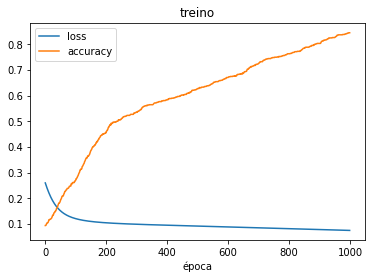

In [37]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['accuracy'], label='accuracy')
plt.title('treino')
plt.xlabel('época')
plt.legend();

#Avaliação de Resultados

In [38]:
# previsões sobre os dados de teste
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test

In [39]:
y_test_predicted

array([[0.22084278, 0.24287409, 0.15842378, ..., 0.15334386, 0.10606083,
        0.13170335],
       [0.14967215, 0.21710512, 0.08260465, ..., 0.21040282, 0.11781001,
        0.12256512],
       [0.15425688, 0.20272642, 0.0794948 , ..., 0.22610822, 0.09913483,
        0.13352913],
       ...,
       [0.12804958, 0.12547567, 0.19165829, ..., 0.04385322, 0.13604695,
        0.0909456 ],
       [0.19356084, 0.20197067, 0.2036727 , ..., 0.0835855 , 0.1433816 ,
        0.06163454],
       [0.13958606, 0.2074647 , 0.04176769, ..., 0.2743528 , 0.0763528 ,
        0.2039206 ]], dtype=float32)

In [40]:
y_test_predicted_indexes

array([4, 4, 4, 1, 3, 0, 2, 7, 0, 1, 2, 4, 2, 7, 6, 4, 6, 1, 4, 7, 2, 7,
       5, 1, 4, 2, 4, 1, 6, 7, 0, 2, 3, 4, 0, 7, 2, 7, 2, 1, 0, 0, 3, 6,
       1, 4, 2, 7, 0, 6, 7, 4, 3, 6, 3, 6, 7, 4, 3, 4, 2, 7, 3, 4, 7, 7,
       1, 2, 0, 4, 4, 4, 7, 1, 3, 2, 3, 2, 4, 7, 2, 1, 4, 4, 1, 2, 6, 4,
       3, 2, 2, 0, 4, 6, 2, 2, 4, 6, 4, 0, 4, 3, 7, 6, 7, 2, 1, 2, 3, 2,
       4, 7, 7, 4, 2, 7, 6, 4, 6, 4, 7, 2, 6, 3, 5, 4, 3, 3, 1, 0, 3, 1,
       2, 4, 2, 4, 4, 6, 2, 1, 2, 2, 3, 2, 6, 7, 4, 4, 2, 2, 3, 2, 4, 5,
       6, 1, 1, 6, 2, 0, 1, 1, 7, 2, 4, 6, 7, 4, 6, 3, 3, 6, 0, 6, 3, 7,
       2, 7, 4, 6, 4, 4, 7, 2, 4, 3, 3, 6, 0, 2, 3, 4, 4, 4, 4, 0, 4, 4,
       4, 0, 4, 7, 3, 0, 2, 6, 4, 1, 2, 1, 3, 4, 4, 4, 2, 7, 3, 4, 2, 1,
       7, 4, 7, 2, 2, 4, 1, 1, 7, 7, 3, 1, 3, 4, 6, 4, 1, 1, 1, 7, 2, 7,
       4, 2, 6, 3, 6, 3, 5, 3, 4, 5, 4, 1, 3, 4, 2, 4, 7, 4, 1, 4, 2, 4,
       7, 7, 4, 6, 4, 4, 4, 4, 6, 3, 6, 4, 1, 2, 4, 7, 4, 3, 5, 0, 5, 3,
       2, 2, 4, 2, 7, 2, 4, 1, 3, 6, 0, 7, 1, 4, 7,

In [41]:
#matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes) 
confMatrix

array([[17,  4,  0,  0,  0,  0,  0,  0],
       [ 5, 31,  0,  0,  0,  0,  0,  0],
       [10,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0],
       [15,  0,  0,  0, 42, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 41]])

In [42]:
# Matriz de confusão
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1', '2', '3', '4', '5', '6', '7'], columns=['0', '1', '2', '3', '4', '5', '6', '7'],)
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)

Predicted   0   1   2   3   4   5   6   7
Actual                                   
0          17   4   0   0   0   0   0   0
1           5  31   0   0   0   0   0   0
2          10   0  45   0   0   0   0   0
3           0   0   0  41   0   0   0   0
4          15   0   0   0  42  25   0   0
5           0   0   0   0   0   8   0   0
6           0   0   0   0   0   0  34   0
7           0   0   0   0   0   2   0  41
